In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
    color: black !important;
}
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 不同窗口不同延迟时间下的对比

In [4]:
def get_drop_latency(wm, latency, threshold):
    """
        params: wm 水印和事件的映射关系 哪一个事件时间产生了水印
                latency: 窗口被哪个水印触发
        return dict {
            "drop": 真实被丢弃的概率(一般不用),
            "late": 迟到率,
            "avg_wait": 每个窗口的平均等待时间
            "pre_win_wait": 用来具体记录每个窗口的等待时间
        }
    """
    wm = pd.read_csv(wm)
    latency = pd.read_csv(latency)
    wm.columns = ["watermark", "ts"]
    
    # drop1是真正丢的数据
    drop1 = wm[-1:].iloc[0]['watermark']/wm[-1:].iloc[0]['ts']
    # drop2是默认迟到的数据
    drop2 = wm[-2:-1].iloc[0]['watermark']/wm[-2:-1].iloc[0]['ts']
#     print(wm[-2:-1], drop2)
    latency.columns = ["watermark", "window_end"]
    latency = latency.set_index("watermark")
    wm = wm.set_index("watermark")
    res = latency.join(wm, how='inner')
    res = res.reset_index(drop = True)
    
    all_wait = 0
    pre_win_wait = []
    for index, row in res.iterrows():
        if row['ts'] - row['window_end'] > threshold+6000:
            row['ts']  = row['window_end'] + threshold
        pre_win_wait.append(row['ts'] - row['window_end'])
        all_wait += row['ts'] - row['window_end']
    avg_wait = all_wait/len(res)
    
    return dict(drop=drop1, late=drop2, avg_wait=avg_wait, pre_win_wait=pre_win_wait)

In [5]:
def list_params_diff_latecny(WaterPaths, TimePaths):
    index = [0,1000 * 60 * 1,1000 * 60 * 2, 1000 * 60 * 3, 1000 * 60 * 4]
    later_rate, avg_win_wait = [], []
    for i in range(len(WaterPaths)):
        water = WaterPaths[i]
        time = TimePaths[i]
        res = get_drop_latency(water, time, index[i])
        later_rate.append(res['late'])
        avg_win_wait.append(res['avg_wait'])
    data = {
        'later_rate': later_rate,
        'avg_win_wait': avg_win_wait
    }
    df = pd.DataFrame(data, index=index)
    return df

## 窗口为60s时

In [6]:
Paths = [
            "./periodic/20171004P0W60/",
            "./periodic/20171004P1W60/",
            "./periodic/20171004P2W60/",
            "./periodic/20171004P3W60/",
            "./periodic/20171004P4W60/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]

In [7]:
adwater = './adwater/20171004AW60/water.csv'
adwait = './adwater/20171004AW60/timelatency.csv'
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000 * 60 * 3)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    com.index = ["0 min","1 min","2 min","3 min","4 min", "adwater"]
    return com

In [8]:
win_1 = get_com_df(adwater,adwait)

In [9]:
win_1

,later_rate,avg_win_wait
0 min,0.866070,352.360044
1 min,0.732516,60399.283796
2 min,0.577757,120389.760528
3 min,0.427050,180393.086817
4 min,0.305467,240383.878691
adwater,0.421206,166433.168317


## 窗口为120s时

In [10]:
Paths = [
            "./periodic/20171004P0W120/",
            "./periodic/20171004P1W120/",
            "./periodic/20171004P2W120/",
            "./periodic/20171004P3W120/",
            "./periodic/20171004P4W120/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]

In [11]:
adwater = './adwater/20171004AW120/water.csv'
adwait = './adwater/20171004AW120/timelatency.csv'
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000 * 60 * 3)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    com.index = ["0 min","1 min","2 min","3 min","4 min", "adwater"]
    return com

In [12]:
win_2 = get_com_df(adwater,adwait)

In [13]:
win_2

,later_rate,avg_win_wait
0 min,0.866070,403.565640
1 min,0.732516,60388.036810
2 min,0.577757,120390.317700
3 min,0.427050,180360.902256
4 min,0.305467,240395.488722
adwater,0.425353,163311.349693


## 窗口为180s时

In [14]:
Paths = [
            "./periodic/20171004P0W3/",
            "./periodic/20171004P1W3/",
            "./periodic/20171004P2W3/",
            "./periodic/20171004P3W3/",
            "./periodic/20171004P4W3/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]
adwater = './adwater/20171004AW3/water.csv'
adwait = './adwater/20171004AW3/timelatency.csv'

In [15]:
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000 * 60 * 3)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    com.index = ["0 min","1 min","2 min","3 min","4 min", "adwater"]
    return com

In [16]:
win_3 = get_com_df(adwater,adwait)

In [17]:
win_3

,later_rate,avg_win_wait
0 min,0.866070,435.955056
1 min,0.732516,60396.436526
2 min,0.577757,120320.796460
3 min,0.427050,180433.628319
4 min,0.305467,240384.955752
adwater,0.427521,161443.458980


## 窗口为240s时

In [18]:
Paths = [
            "./periodic/20171004P0W4/",
            "./periodic/20171004P1W4/",
            "./periodic/20171004P2W4/",
            "./periodic/20171004P3W4/",
            "./periodic/20171004P4W4/",
           ]
WaterPaths = [path+"water.csv" for path in Paths]
TimePaths = [path+"timelatency.csv" for path in Paths]
adwater = './adwater/20171004AW4/water.csv'
adwait = './adwater/20171004AW4/timelatency.csv'

In [19]:
def get_com_df(adwater, adwait):
    com = list_params_diff_latecny(WaterPaths, TimePaths)
    a = get_drop_latency(adwater, adwait, 1000 * 60 * 3)
    df_a = pd.DataFrame({"later_rate":[a['late']],"avg_win_wait":[a['avg_wait']]}, index=["adwater"])
    com = com.append(df_a)
    com.index = ["0 min","1 min","2 min","3 min","4 min", "adwater"]
    return com

In [20]:
win_4 = get_com_df(adwater,adwait)

In [21]:
win_4

,later_rate,avg_win_wait
0 min,0.866070,325.443787
1 min,0.732516,60447.058824
2 min,0.577757,120451.612903
3 min,0.427050,180299.120235
4 min,0.305467,240326.470588
adwater,0.428087,161362.831858


## 合并结果

In [22]:
win = [win_1, win_2, win_3, win_4]
com = pd.concat(win, axis=1)
com.columns = [["WinSize-1min","WinSize-1min","WinSize-2min","WinSize-2min","WinSize-3min","WinSize-3min", "WinSize-4min", "WinSize-4min"],["later_rate", "avg_win_wait", "later_rate", "avg_win_wait", "later_rate", "avg_win_wait","later_rate", "avg_win_wait"]]

In [23]:
com

WinSize-1min                WinSize-2min                WinSize-3min  \
          later_rate   avg_win_wait   later_rate   avg_win_wait   later_rate   
0 min       0.866070     352.360044     0.866070     403.565640     0.866070   
1 min       0.732516   60399.283796     0.732516   60388.036810     0.732516   
2 min       0.577757  120389.760528     0.577757  120390.317700     0.577757   
3 min       0.427050  180393.086817     0.427050  180360.902256     0.427050   
4 min       0.305467  240383.878691     0.305467  240395.488722     0.305467   
adwater     0.421206  166433.168317     0.425353  163311.349693     0.427521   

                       WinSize-4min                 
          avg_win_wait   later_rate   avg_win_wait  
0 min       435.955056     0.866070     325.443787  
1 min     60396.436526     0.732516   60447.058824  
2 min    120320.796460     0.577757  120451.612903  
3 min    180433.628319     0.427050  180299.120235  
4 min    240384.955752     0.305467  240326.470588  
adwater  161443.458980     0.428087  161362.831858

In [24]:
(240326.470588-161362.831858)/240326.470588

0.32856821196933444

## 画图

In [25]:
win_1['Window Size'] = ["1min" for i in range(6)]
win_2['Window Size'] = ["2min" for i in range(6)]
win_3['Window Size'] = ["3min" for i in range(6)]
win_4['Window Size'] = ["4min" for i in range(6)]

In [26]:
sns.set(style="whitegrid")

In [27]:
draw = pd.DataFrame()
draw = draw.append(win)
draw.index =["0 min","1 min","2 min","3 min","4 min", "adwater"]*4
draw['delay'] = draw.index
draw['Average Data Lateness Ratio'] = draw['later_rate']
draw['Average Window Waiting Time(s)'] = draw['avg_win_wait']/1000

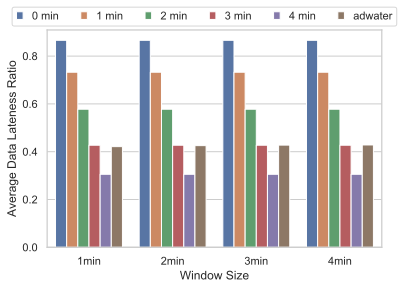

In [28]:
sns.barplot(x="Window Size", y = "Average Data Lateness Ratio", hue="delay", data=draw)
plt.legend(loc='upper center', bbox_to_anchor=(0.47, 1.13), ncol=6, fancybox=True, handlelength=0.6)
plt.savefig('late-didi.pdf',bbox_inches='tight',format='pdf')

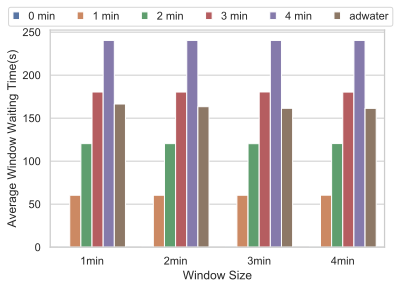

In [29]:
sns.barplot(x="Window Size", y = "Average Window Waiting Time(s)", hue="delay", data=draw)
plt.legend(loc='upper center', bbox_to_anchor=(0.45, 1.13), ncol=6, fancybox=True, handlelength=0.6)
plt.savefig('wait-didi.pdf',bbox_inches='tight',format='pdf')